In [15]:
import pandas as pd 
import numpy as np 
import sklearn

In [16]:
data=pd.read_csv('./Fifa 23 Players Data.csv')

In [17]:
data.head()

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18539 entries, 0 to 18538
Data columns (total 89 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Known As                     18539 non-null  object
 1   Full Name                    18539 non-null  object
 2   Overall                      18539 non-null  int64 
 3   Potential                    18539 non-null  int64 
 4   Value(in Euro)               18539 non-null  int64 
 5   Positions Played             18539 non-null  object
 6   Best Position                18539 non-null  object
 7   Nationality                  18539 non-null  object
 8   Image Link                   18539 non-null  object
 9   Age                          18539 non-null  int64 
 10  Height(in cm)                18539 non-null  int64 
 11  Weight(in kg)                18539 non-null  int64 
 12  TotalStats                   18539 non-null  int64 
 13  BaseStats                    18

In [19]:
data1=data[data['Overall']>=85]

In [20]:
data1.head()

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21


In [21]:
mbapeh=data.loc[data['Full Name']=='Kylian Mbappé']
messi=data.loc[data['Full Name']=='Lionel Messi']
ronaldo=data.loc[data['Full Name']=='C. Ronaldo dos Santos Aveiro']
taremi=data.loc[data['Full Name']=='Mehdi Taremi']

In [22]:
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer
class Model():
    def __init__(self,n) -> None:
        self.k=n
    def fit(self,data):
        numeric_data=data._get_numeric_data()
        self.normalizer=Normalizer()
        self.pca=PCA(n_components=2)
        self.kmeans = KMeans(n_clusters=self.k, random_state=0, n_init="auto")
        self.pipe = Pipeline(steps=[("scaler", self.normalizer), ("pca", self.pca), ("kemans",self. kmeans)])
        self.pipe.fit(numeric_data)
    def pca_transform(self,data):
        numeric_data=data._get_numeric_data()
        normal_data=self.normalizer.transform(numeric_data)
        return self.pca.transform(normal_data)
    def transform(self,data):
        numeric_data=data._get_numeric_data()
        return self.pipe.transform(numeric_data)
    def predict(self,data):
        numeric_data=data._get_numeric_data()
        return self.pipe.predict(numeric_data)
        

In [24]:
model=Model(5)
model.fit(data1)
model.transform(messi)
print("Messi",model.predict(messi))
print("Ronaldo",model.predict(ronaldo))
print("Mbapeh",model.predict(mbapeh))
print("Taremi",model.predict(taremi))
# player3=np.array([messi,ronaldo,mbapeh])
# model.predict(player3)

Messi [4]
Ronaldo [2]
Mbapeh [2]
Taremi [2]


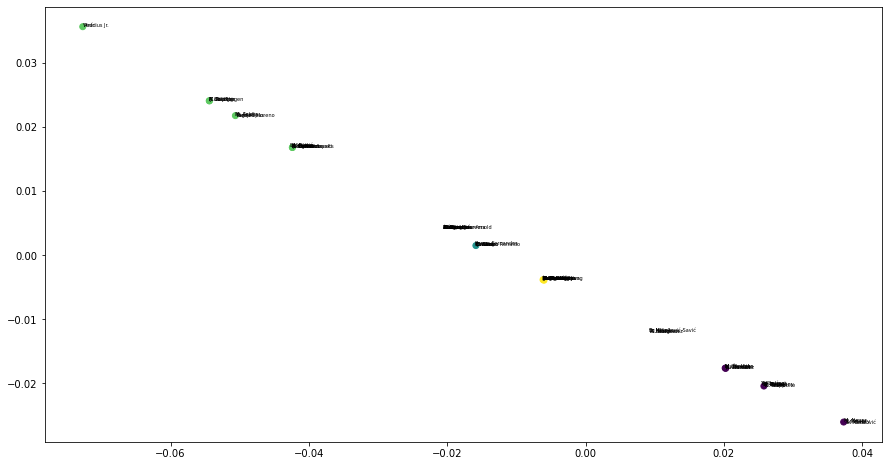

In [8]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(8)
index=list(range(0,91,7))
ax.scatter(model.pca_transform(data1)[:,0][index], model.pca_transform(data1)[:,1][index],c=model.predict(data1)[index])
names=data1['Known As'].to_numpy()
for i, txt in enumerate(names):
    ax.annotate(txt, (model.pca_transform(data1)[:,0][i],model.pca_transform(data1)[:,1][i]),fontsize=5)

In [33]:
number_bestpos=data['Best Position'].unique().shape[0]
model2=Model(number_bestpos)
model2.fit(data)
pred=model2.predict(data)
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
true_clusters=label.fit_transform(data['Best Position'])
# pd.get_dummies(data['Best Position'])

In [54]:
from scipy import stats
data.groupby('Best Best Position').unique()
for i in range(number_bestpos):
    a=data[data['Best Position']==i]
    a=data.loc[pred==i,:]['Best Position']
    m = stats.mode(a)[0][0]
    print(m)
    

KeyError: 'Best Best Position'

In [53]:
pd.unique(data.groupby('Best Position'))

TypeError: unhashable type: 'DataFrame'

In [47]:
l=np.array([1,2,5,6,5,1,1,1,2,5,2,2])
from scipy import stats

# a = np.array([[1, 3, 4, 2, 2, 7],
#               [5, 2, 2, 1, 4, 1],
#               [3, 3, 2, 2, 1, 1]])

m = stats.mode(l)[0][0]
m

1

In [37]:
sum(true_clusters==pred)/pred.shape[0]

0.07449161227682184

In [139]:
d=pd.read_csv('./abc.csv')

In [150]:
d.groupby('a')['b']

In [4]:
df['newcol']=df['sals'].copy()
df['month']

A    
1  5     74
   1     22
2  4     36
   3     35
3  10    41
   2     15
Name: C, dtype: int64

In [12]:
a=np.array([1,5,6,9,8,7,5,6,6,3,14,63])
b=np.array([12,5,6,9,8,5,5,5,5,64,7,14])

In [13]:
a.shape
# b.shape

(12,)